In [5]:
# import needed files
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#import data
data = pd.read_csv("mental_health_digital_behavior_data.csv")
data.head()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7


In [7]:
#Check general info of the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daily_screen_time_min    500 non-null    float64
 1   num_app_switches         500 non-null    int64  
 2   sleep_hours              500 non-null    float64
 3   notification_count       500 non-null    int64  
 4   social_media_time_min    500 non-null    float64
 5   focus_score              500 non-null    float64
 6   mood_score               500 non-null    float64
 7   anxiety_level            500 non-null    float64
 8   digital_wellbeing_score  500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [8]:
#Check stats of the data
data.describe()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,360.437800,49.840000,6.557400,79.51200,121.771800,6.998000,8.988600,8.451800,52.310400
std,58.782476,7.340993,1.192043,23.97974,43.809443,0.618742,0.519104,2.134425,7.943186
min,180.000000,30.000000,3.000000,20.00000,30.000000,5.500000,7.400000,1.000000,34.600000
25%,317.975000,44.000000,5.800000,63.00000,91.875000,6.600000,8.600000,7.275000,46.800000
50%,360.800000,50.000000,6.500000,80.00000,119.550000,7.000000,9.000000,9.700000,51.000000
75%,398.175000,55.000000,7.325000,96.00000,149.500000,7.400000,9.300000,10.000000,56.600000
max,591.200000,72.000000,10.000000,158.00000,296.700000,8.600000,10.000000,10.000000,80.800000


Checking data distribution.

daily_screen_time_min
num_app_switches
sleep_hours
notification_count
social_media_time_min
focus_score
mood_score
anxiety_level
digital_wellbeing_score


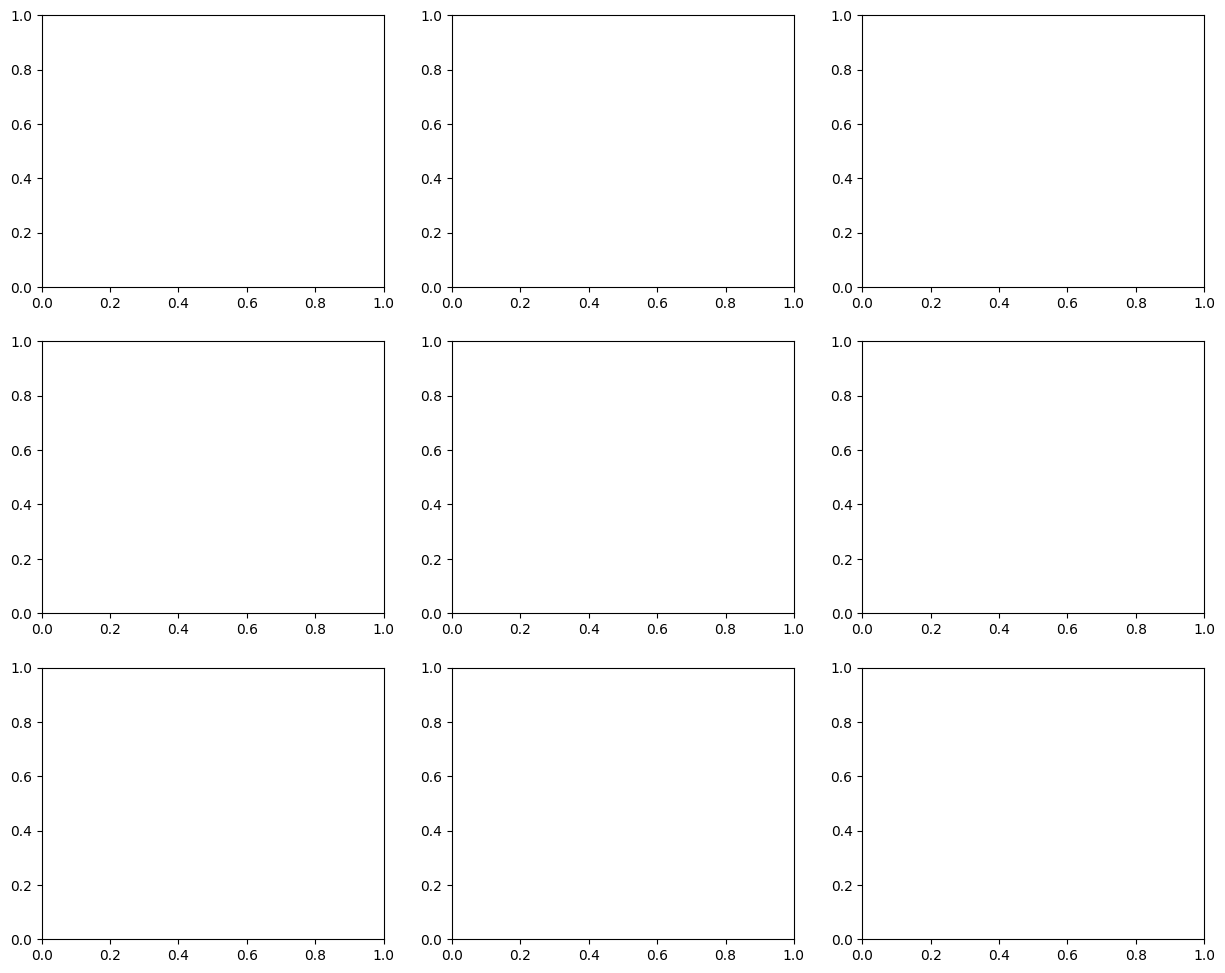

In [12]:
# Create subplots(3rows,3 cols)
fig,axes = plt.subplots(3,3, figsize = (15,12))
#Flatten axes 
axes = axes.flatten()
for i in data.loc['daily_screen_time_min':'digital_wellbeing_score']:
    print(i)


CHECKING OUTLIERS

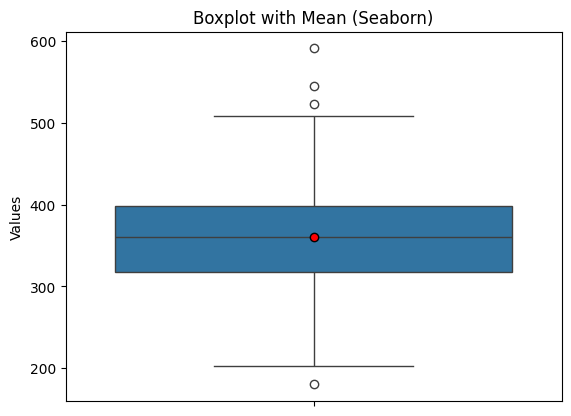

In [10]:
sns.boxplot(y=data['daily_screen_time_min'], showmeans= True,
            meanprops = {'marker':'o', 'markerfacecolor':'red','markeredgecolor':'black'} )
plt.title("Boxplot with Mean (Seaborn)")
plt.ylabel("Values")
plt.show()